# Preprocessing & EDA

In [ ]:
# Step 1: Upload Both Files
from google.colab import files
print("Upload train.csv and test.csv now...")
uploaded = files.upload()

Upload train.csv and test.csv now...


Saving test.csv to test.csv
Saving traincsv.csv to traincsv.csv


In [ ]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Step 3: Load Datasets
train_df = pd.read_csv("traincsv.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
# Step 4: Display Initial Info
print("\n Train Data Info:")
print(train_df.info())
print("\n Test Data Info:")
print(test_df.info())


 Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB
None

 Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: i

In [ ]:
# Step 5: Convert Sales Columns to Numeric
sales_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']
for col in sales_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

In [ ]:
# Step 6: Handle Missing Values (Median Imputation)
for col in sales_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())

In [ ]:
# Step 7: Drop Duplicates
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [ ]:
# Step 8: Remove Outliers from Train Data (Z-score method)
z_scores = np.abs(zscore(train_df[sales_cols]))
train_df = train_df[(z_scores < 3).all(axis=1)]

In [ ]:
# Step 9: Summary Stats
print("\n Summary Statistics - Train Data:")
display(train_df.describe().T)
print("\n Summary Statistics - Test Data:")
display(test_df.describe().T)


 Summary Statistics - Train Data:


,count,mean,std,min,25%,50%,75%,max
Customer_ID,746445.0,1.038704e+07,223482.781035,10000000.0,10193455.00,10387013.00,10580591.00,10774154.00
luxury_sales,746447.0,1.797614e+03,772.737925,500.0,1196.34,1677.34,2253.59,4359.04
fresh_sales,746447.0,4.398463e+03,3389.400266,500.0,1586.10,3179.84,6830.20,13997.90
dry_sales,746447.0,4.655409e+03,3467.610558,500.0,1753.92,3521.76,7322.28,13999.30



 Summary Statistics - Test Data:


,count,mean,std,min,25%,50%,75%,max
Customer_ID,40749.0,20375.000000,11763.367396,1.0,10188.00,20375.000,30562.00,40749.00
luxury_sales,40749.0,1927.113861,1003.766320,500.8,1220.40,1721.720,2346.12,6985.65
fresh_sales,40749.0,4442.831654,3349.366896,500.3,1619.55,3369.030,6696.95,13995.10
dry_sales,40749.0,4691.510246,3410.980517,500.9,1799.52,3755.345,7183.44,13989.50


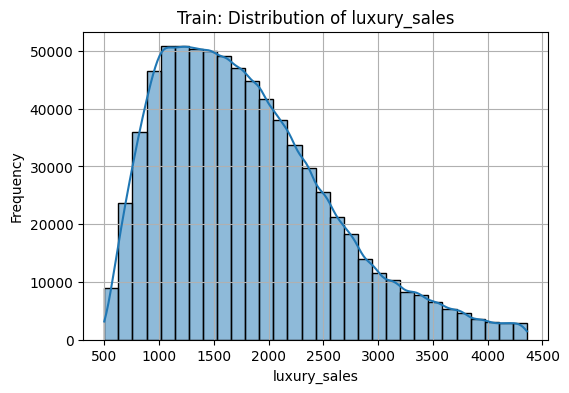

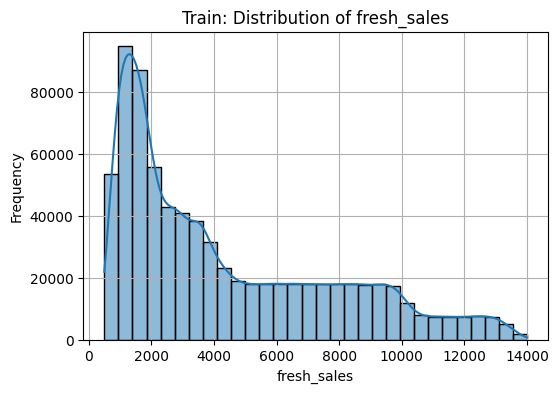

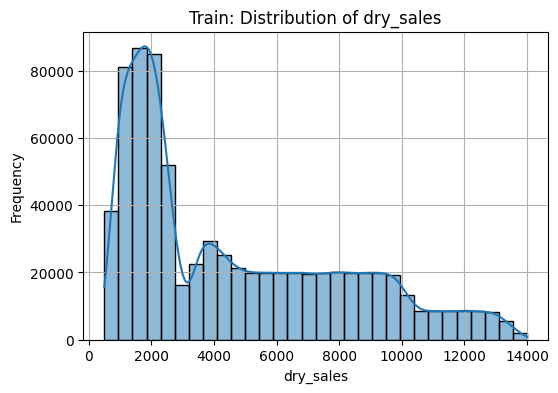

In [ ]:
# Step 10: HISTOGRAMS (Train)
for col in sales_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'Train: Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

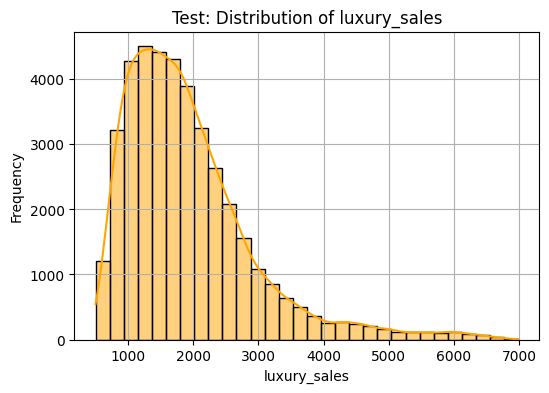

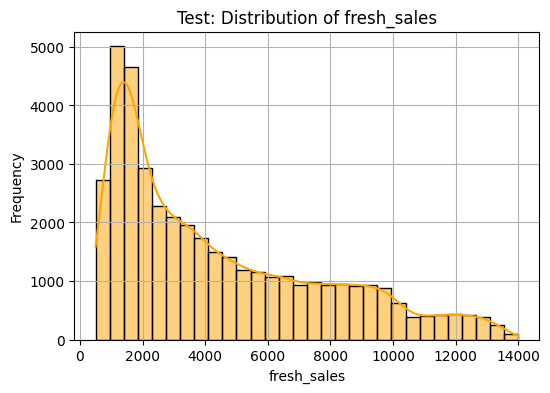

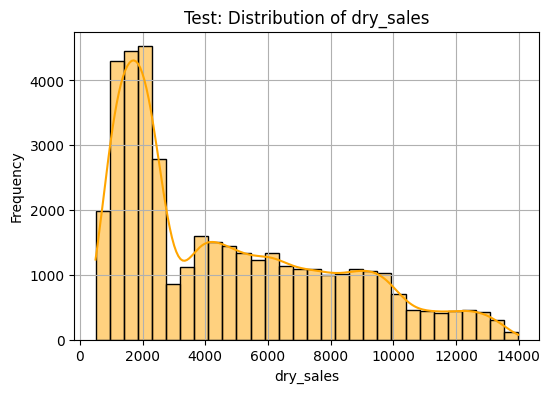

In [ ]:
# Step 11: HISTOGRAMS (Test)
for col in sales_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(test_df[col], kde=True, bins=30, color='orange')
    plt.title(f'Test: Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

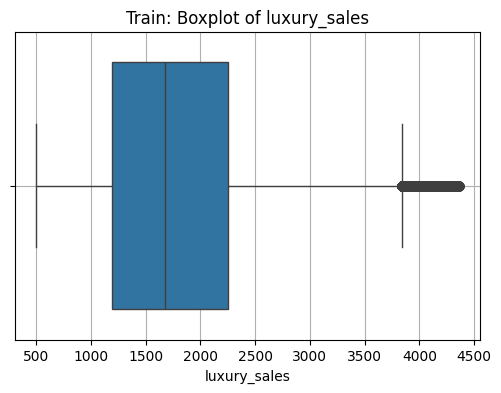

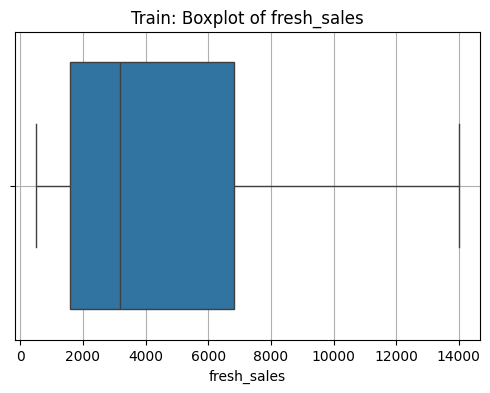

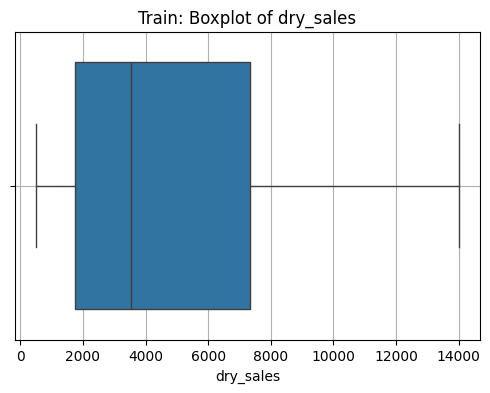

In [ ]:
# Step 12: BOXPLOTS (Train)
for col in sales_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Train: Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

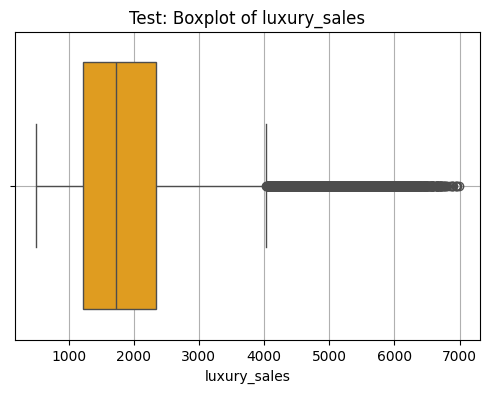

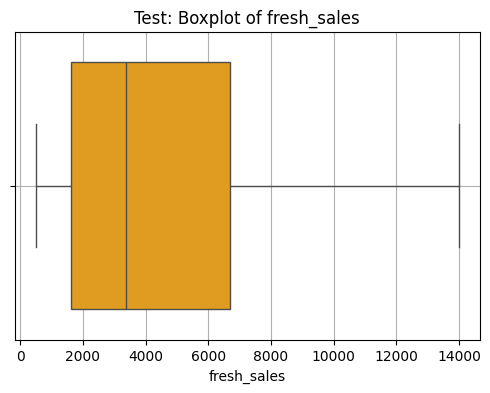

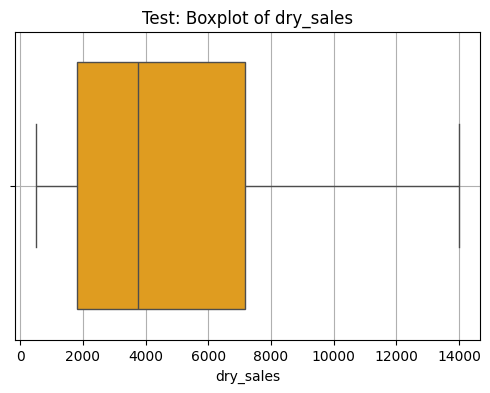

In [ ]:
# Step 12: BOXPLOTS (Test)
for col in sales_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=test_df[col], color='orange')
    plt.title(f'Test: Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

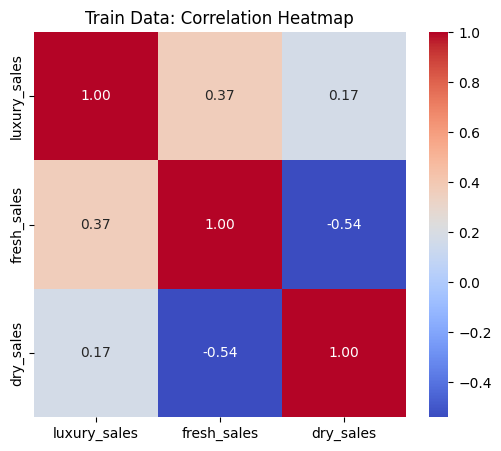

In [ ]:
# Step 13: CORRELATION HEATMAP (Train)
plt.figure(figsize=(6, 5))
sns.heatmap(train_df[sales_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Train Data: Correlation Heatmap")
plt.show()

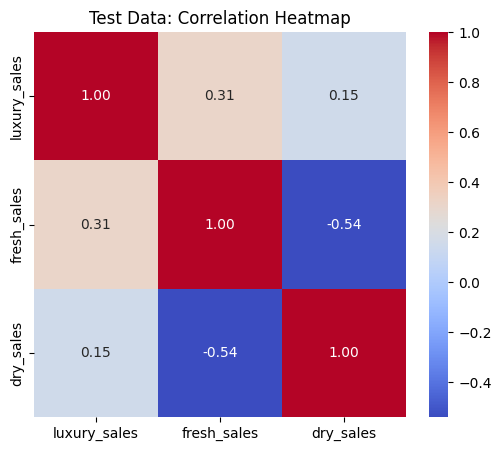

In [ ]:
# Step 14: CORRELATION HEATMAP (Test)
plt.figure(figsize=(6, 5))
sns.heatmap(test_df[sales_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Test Data: Correlation Heatmap")
plt.show()

In [ ]:
# Step 15: Export Cleaned CSVs
train_df.to_csv("preprocessed_train_data.csv", index=False)
test_df.to_csv("preprocessed_test_data.csv", index=False)
print("\n Preprocessed CSVs saved: 'preprocessed_train_data.csv' and 'preprocessed_test_data.csv'")

# Step 16: Download
files.download("preprocessed_train_data.csv")
files.download("preprocessed_test_data.csv")


 Preprocessed CSVs saved: 'preprocessed_train_data.csv' and 'preprocessed_test_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Upload your preprocessed training dataset if not already uploaded
from google.colab import files
uploaded = files.upload()

# Import pandas and load the dataset
import pandas as pd

train_df = pd.read_csv("preprocessed_train_data.csv")  # Make sure filename is correct

# Show unique values in cluster_catgeory
print("Unique values in 'cluster_catgeory' column:")
print(train_df["cluster_catgeory"].unique())

Saving preprocessed_train_data.csv to preprocessed_train_data.csv
Unique values in 'cluster_catgeory' column:
['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 nan 100.0 89.0]


<ipython-input-2-f421eea82b34>:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("preprocessed_train_data.csv")  # Make sure filename is correct


In [ ]:
# Clean the correct column with typo fixed: 'cluster_catgeory'
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].astype(str).str.extract('(\d+)')  # Extract digits
train_df['cluster_catgeory'] = pd.to_numeric(train_df['cluster_catgeory'], errors='coerce')  # Convert to int

# Optional: Keep only valid cluster values (if you expect 1–6 for example)
train_df = train_df[train_df['cluster_catgeory'].isin([1, 2, 3, 4, 5, 6])]

# Reset index
train_df.reset_index(drop=True, inplace=True)

# Check again
print("Cleaned values in 'cluster_catgeory':")
print(train_df['cluster_catgeory'].unique())


Cleaned values in 'cluster_catgeory':
[4. 1. 2. 5. 3. 6.]
